In [1]:
%load_ext autoreload
%autoreload 2s

In [2]:
import _init_paths

In [3]:
from core.config import update_config
from core.config import config
from core.config import update_config
from core.config import update_dir
from core.config import get_model_name
from core.loss import JointsMSELoss
from core.function import train
from core.function import validate
from utils.utils import get_optimizer
from utils.utils import save_checkpoint
from utils.utils import create_logger

import dataset
import models

import torchvision.transforms as transforms
import torch

import matplotlib.pyplot as plt
import numpy as np

In [4]:
cd ..

/home/whikwon/Documents/github/human-pose-estimation.pytorch


In [5]:
update_config('./experiments/coco/resnet50/256x192_d256x3_adam_lr1e-3_medi.yaml')

In [6]:
model = eval('models.'+config.MODEL.NAME+'.get_pose_net')(config, is_train=True)

In [7]:
model

PoseResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bi

In [8]:
config.DATASET.DATASET

'medi'

In [9]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_dataset = eval('dataset.'+config.DATASET.DATASET)(
    config,
    transforms.Compose([
        transforms.ToTensor(),
        normalize,
    ])
)

In [10]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.TRAIN.BATCH_SIZE,
    shuffle=config.TRAIN.SHUFFLE,
    num_workers=config.WORKERS,
    pin_memory=True
)

In [11]:
sample = iter(train_loader).next()

In [14]:
sample['imgs'].shape

torch.Size([32, 1, 256, 192])

In [16]:
sample['heatmap'].shape

torch.Size([32, 1, 64, 48])

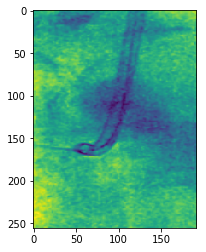

In [17]:
plt.imshow(sample['imgs'][0,0])

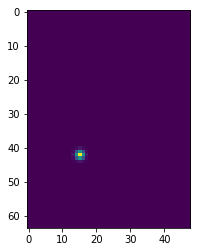

In [18]:
plt.imshow(sample['heatmap'][0,0])

In [27]:
# 물체 중심으로 cropping
img = sample[0][0][0]

In [79]:
img.shape

torch.Size([256, 192])

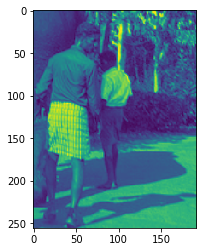

In [38]:
plt.imshow(img)

In [82]:
# heatmap target
heatmap = sample[1][0]

In [83]:
heatmap.shape

torch.Size([17, 64, 48])

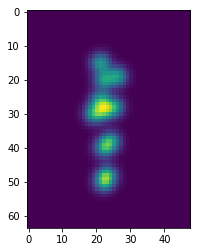

In [67]:
plt.imshow(np.sum(x.numpy(), 0))

In [36]:
# 전체 이미지
img_3 = plt.imread(sample[3]['image'][0])

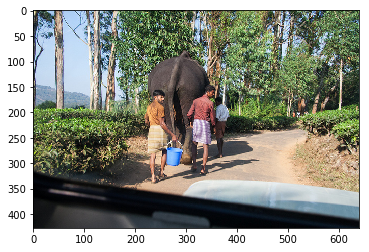

In [68]:
plt.imshow(img_3)

In [78]:
eval('dataset.coco')

dataset.coco.COCODataset

In [69]:
config.DATASET.DATASET

'coco'